In [1]:
pwd

'C:\\Users\\Sanju032\\Desktop\\Python_Examples\\Antwak\\Class-2\\Mobile App Usage Analysis'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [3]:
cd C:\\Users\\Sanju032\\Desktop\\Python_Examples\\Antwak\\Class-2\\Mobile App Usage Analysis\\DataSet

C:\Users\Sanju032\Desktop\Python_Examples\Antwak\Class-2\Mobile App Usage Analysis\DataSet


In [4]:
# Read all CSV files in different dataframes
df1=pd.read_csv('User_activity.txt')
df2=pd.read_csv('publishers.csv')
df3=pd.read_csv('device_demographics.csv')

In [5]:
# Display the data present in the dataframes and there shape
print('User Activity Data:\n',df1.head(),'\n\nThe number of rows and columns:', df1.shape,'\n Number of null values presented in df1:\n',df1.isnull().sum())
print('\n Publishers data:\n',df2.head(),'\n\n The number of rows and columns:', df2.shape,'\n Number of null values presented in df2:\n',df2.isnull().sum())
print('\n Device Demographics Data:\n',df3.head(),'\n\n The number of rows and columns:', df3.shape,'\n Number of null values presented in df3:\n',df3.isnull().sum())

User Activity Data:
   Unnamed: 0                      0                       1  \
0  device_id             B-52-23845              B-52-16587   
1   app_name  Snapchat (Mobile App)  Pinterest (Mobile App)   
2    minutes                27.9342                 14.6664   

                       2                        3                     4  \
0             B-52-36461               B-52-29089            B-52-14212   
1  Facebook (Mobile App)  Yahoo Mail (Mobile App)  Netflix (Mobile App)   
2               439.7652                 900.6606               17.3502   

                        5                            6  \
0              B-52-30970                   B-52-15903   
1  Instagram (Mobile App)  Yahoo Newsroom (Mobile App)   
2                  16.065                      42.6006   

                            7                     8  ...  \
0                  B-52-12407            B-52-22743  ...   
1  Google Search (Mobile App)  YouTube (Mobile App)  ...   
2           

## Transposing the dataframe and starting with data wrangling

In [6]:
#Transposing data to match with the other data frames and better view
df4 = df1.transpose()
df4.head()

,0,1,2
Unnamed: 0,device_id,app_name,minutes
0,B-52-23845,Snapchat (Mobile App),27.9342
1,B-52-16587,Pinterest (Mobile App),14.6664
2,B-52-36461,Facebook (Mobile App),439.7652
3,B-52-29089,Yahoo Mail (Mobile App),900.6606


In [7]:
# Checking the total number of null values per column
df4.isnull().sum()

0      0
1      0
2    748
dtype: int64

In [8]:
df4.iloc[0] #grab the first row for the header

0    device_id
1     app_name
2      minutes
Name: Unnamed: 0, dtype: object

In [9]:
 #Renaming Column names to 1st row data and dropping row at index = 0
df5=df4.rename(columns=df4.iloc[0]).drop(df4.index[0])
#new_header = df4.iloc[0] #grab the first row for the header
#df4 = df4[1:] #take the data less the header row
#df4.columns = new_header #set the header row as the df header
# df4.rename(columns=df4.iloc[0]) # first row as a column df

In [10]:
df5.head()

,device_id,app_name,minutes
0,B-52-23845,Snapchat (Mobile App),27.9342
1,B-52-16587,Pinterest (Mobile App),14.6664
2,B-52-36461,Facebook (Mobile App),439.7652
3,B-52-29089,Yahoo Mail (Mobile App),900.6606
4,B-52-14212,Netflix (Mobile App),17.3502


In [11]:
df5.isnull().sum()

device_id      0
app_name       0
minutes      748
dtype: int64

## Check the duplictes for each data frame individually and remove them

In [12]:
# Find the number of unique sample presented in each column in all the data frames
print('Number of Unique data points present in User Activity df \n',df5.nunique(), '\nNumber of Unique data points present in Publishers df \n',df2.nunique(),'\nNumber of Unique data points present in Device Demographics df \n',df3.nunique())

Number of Unique data points present in User Activity df 
 device_id     2774
app_name        21
minutes      13219
dtype: int64 
Number of Unique data points present in Publishers df 
 app_name     21
Publisher     9
dtype: int64 
Number of Unique data points present in Device Demographics df 
 device_id    2774
gender_id       2
dtype: int64


In [13]:
# Remove duplicates from each data frame individually
df5.drop_duplicates(subset ="device_id", keep='first', inplace = True)
df2.drop_duplicates(subset ="app_name", keep='first', inplace = True)
df3.drop_duplicates(subset ="device_id", keep='first', inplace = True)

In [14]:
df5.nunique()

device_id    2774
app_name       21
minutes      2310
dtype: int64

## Perform EDA on the datasets and join them

In [15]:
df_Merge1=pd.merge(df3,df5, on=('device_id'), how='inner')
print('shape of the merge data frame 1:',df_Merge1.shape, '\n\n first five rows of merge df1:\n',df_Merge1.head(),'\n Number of null values presented in first merged data frame df:\n',df_Merge1.isnull().sum())

shape of the merge data frame 1: (2774, 4) 

 first five rows of merge df1:
     device_id  gender_id                 app_name   minutes
0  B-52-23845        2.0    Snapchat (Mobile App)   27.9342
1  B-52-16587        1.0   Pinterest (Mobile App)   14.6664
2  B-52-36461        2.0    Facebook (Mobile App)  439.7652
3  B-52-29089        2.0  Yahoo Mail (Mobile App)  900.6606
4  B-52-14212        2.0     Netflix (Mobile App)   17.3502 
 Number of null values presented in first merged data frame df:
 device_id     0
gender_id    98
app_name      0
minutes      92
dtype: int64


In [16]:
df=pd.merge(df_Merge1, df2, on=('app_name'), how='inner')
print('shape of the merge data frame 1:',df.shape, '\n\n first five rows of merge df1:\n',df.head(),'\n\n Number of null values presented in final data frame df:\n',df.isnull().sum())

shape of the merge data frame 1: (2774, 5) 

 first five rows of merge df1:
     device_id  gender_id               app_name    minutes      Publisher
0  B-52-23845        2.0  Snapchat (Mobile App)    27.9342  Snapchat, Inc
1   B-52-6821        2.0  Snapchat (Mobile App)     17.199  Snapchat, Inc
2  B-52-21945        2.0  Snapchat (Mobile App)   181.7046  Snapchat, Inc
3  B-52-24149        2.0  Snapchat (Mobile App)   133.3962  Snapchat, Inc
4  B-52-28462        NaN  Snapchat (Mobile App)  1252.7676  Snapchat, Inc 

 Number of null values presented in final data frame df:
 device_id     0
gender_id    98
app_name      0
minutes      92
Publisher     0
dtype: int64


In [17]:
df.dtypes

device_id     object
gender_id    float64
app_name      object
minutes       object
Publisher     object
dtype: object

In [18]:
# change the data type of minute to float
df = df.astype({'minutes':'float64'})
df.dtypes

device_id     object
gender_id    float64
app_name      object
minutes      float64
Publisher     object
dtype: object

In [19]:
# find the number of unique\distinct values present in the dataframe
df.nunique()

device_id    2774
gender_id       2
app_name       21
minutes      2310
Publisher       9
dtype: int64

In [20]:
# if number of distince values present in the dataframe withespect to base column then remove those.
df.drop_duplicates(subset ="device_id", inplace = True)
df.shape

(2774, 5)

In [21]:
# sort the data based on app name and minutes
df.sort_values(by=['app_name', 'minutes'],inplace=True)
df.head()

,device_id,gender_id,app_name,minutes,Publisher
2492,B-52-40394,1.0,Amazon Mobile (Mobile App),0.1890,Amazon Sites
2395,B-52-1805,NaN,Amazon Mobile (Mobile App),0.2646,Amazon Sites
2426,B-52-26961,2.0,Amazon Mobile (Mobile App),0.2646,Amazon Sites
2391,B-52-40147,2.0,Amazon Mobile (Mobile App),0.3024,Amazon Sites
2432,B-52-2451,2.0,Amazon Mobile (Mobile App),0.3024,Amazon Sites


In [22]:
# for better understanding reset the index
df.reset_index(drop=True,inplace=True)
df.head()

,device_id,gender_id,app_name,minutes,Publisher
0,B-52-40394,1.0,Amazon Mobile (Mobile App),0.1890,Amazon Sites
1,B-52-1805,NaN,Amazon Mobile (Mobile App),0.2646,Amazon Sites
2,B-52-26961,2.0,Amazon Mobile (Mobile App),0.2646,Amazon Sites
3,B-52-40147,2.0,Amazon Mobile (Mobile App),0.3024,Amazon Sites
4,B-52-2451,2.0,Amazon Mobile (Mobile App),0.3024,Amazon Sites


#### Apply some transformations and create intermediate files (lookup tables)

In [30]:
# Create the intermediate file using group by on column 'app_name' and 'Publisher' and take the mode across gender id.
# tran1 = df.groupby(['app_name', 'Publisher']).agg({'gender_id': pd.Series.mode})
tran1 = df.groupby(['app_name', 'Publisher'])['gender_id'].agg(pd.Series.mode).to_frame()

In [31]:
# tran1.reset_index(inplace=True)
tran1.head()

,,gender_id
app_name,Publisher,
Amazon Mobile (Mobile App),Amazon Sites,2.0
Amazon Music with Prime Music (Mobile App),Amazon Sites,2.0
Facebook (Mobile App),Facebook,2.0
Facebook Messenger (Mobile App),Facebook,2.0
Google Play (Mobile App),Google Sites,2.0


In [32]:
df['gender_id'].value_counts()

2.0    1657
1.0    1019
Name: gender_id, dtype: int64

In [33]:
df.groupby(['app_name', 'Publisher'])['gender_id'].value_counts()

app_name                                    Publisher        gender_id
Amazon Mobile (Mobile App)                  Amazon Sites     2.0          128
                                                             1.0           69
Amazon Music with Prime Music (Mobile App)  Amazon Sites     2.0           16
                                                             1.0            7
Facebook (Mobile App)                       Facebook         2.0          173
                                                             1.0          118
Facebook Messenger (Mobile App)             Facebook         2.0          191
                                                             1.0          119
Google Play (Mobile App)                    Google Sites     2.0          228
                                                             1.0          149
Google Search (Mobile App)                  Google Sites     2.0          198
                                                             1.0       

#### From the above goupby function, we can say that the tran1 data frame correctly obtained; eventhough all values are 2 in the mode column of gender_id

In [34]:
# For any NaN values in the gender_id column, replace missing values using the table created from above steps.
# df[df['gender_id'].isnull()].apply(lambda row:tran1.loc[(row['app_name'],row['Publisher']),'gender_id'],axis=1)
df.loc[df['gender_id'].isnull(),'gender_id'] = df[df['gender_id'].isnull()].apply(lambda row:tran1.loc[(row['app_name'],row['Publisher']),'gender_id'],axis=1)

In [35]:
df.isnull().sum()

device_id     0
gender_id     0
app_name      0
minutes      92
Publisher     0
dtype: int64

In [36]:
# Create the intermediate file using group by on column 'app_name' and 'Publisher' and take the median across minutes.
# tran2 = df.groupby(['app_name', 'Publisher'])['minutes'].agg(pd.Series.median).to_frame()
# tran2 = df.groupby(['app_name', 'Publisher'])['minutes'].agg('median').to_frame()
tran2 = df.groupby(['app_name', 'Publisher']).agg({'minutes': 'median'})
# tran2.reset_index(inplace=True)
tran2.head()

,,minutes
app_name,Publisher,
Amazon Mobile (Mobile App),Amazon Sites,43.3566
Amazon Music with Prime Music (Mobile App),Amazon Sites,3.1752
Facebook (Mobile App),Facebook,2654.8641
Facebook Messenger (Mobile App),Facebook,1242.7506
Google Play (Mobile App),Google Sites,58.0608


In [37]:
# For any NaN values in the minutes column, replace missing values from the above created table.
df.loc[df['minutes'].isnull(),'minutes'] = df[df['minutes'].isnull()].apply(lambda row:tran2.loc[(row['app_name'],row['Publisher']),'minutes'],axis=1)

In [38]:
df.isnull().sum()

device_id    0
gender_id    0
app_name     0
minutes      0
Publisher    0
dtype: int64

Here we have replaced the null values in gender_id and minutes column using the mode and median values recieved from the intermediate table 'tran1' and 'tran2' obtained after groupby transformation.

## Perform Filtering operations

Let's perform filtering based on minutes column if the value is greater than (median + standard deviation) across app_name or minutes value is less than 30 mins. Lets do a groupby across app_name column

In [39]:
tran3 = df.groupby('app_name').agg({'minutes': ('median', 'std') })
tran3.head()

minutes             
                                               median          std
app_name                                                          
Amazon Mobile (Mobile App)                    43.3566   463.022715
Amazon Music with Prime Music (Mobile App)     3.1752   198.577105
Facebook (Mobile App)                       2654.8641  3413.670002
Facebook Messenger (Mobile App)             1242.7506  2757.200365
Google Play (Mobile App)                      58.0608   222.125744

In [40]:
# remove the first row from the intermediate table and create threshold column of median+standard deviation of minutes column
tran3 = tran3.droplevel(0,axis=1)
tran3['thres'] = tran3['median'] + tran3['std']
tran3.head()

,median,std,thres
app_name,,,
Amazon Mobile (Mobile App),43.3566,463.022715,506.379315
Amazon Music with Prime Music (Mobile App),3.1752,198.577105,201.752305
Facebook (Mobile App),2654.8641,3413.670002,6068.534102
Facebook Messenger (Mobile App),1242.7506,2757.200365,3999.950965
Google Play (Mobile App),58.0608,222.125744,280.186544


In [41]:
tran3.loc['Amazon Mobile (Mobile App)','thres']

506.37931456507044

In [88]:
# filter the data across minutes column if the value is greater than (median + standard deviation) across app_name or minutes value id less than 30 mins
filter1 = df.apply((lambda row: True if (row['minutes'] > tran3.loc[row['app_name'],'thres'] or row['minutes'] < 30) else False),axis=1)

In [89]:
df_filtered = df[filter1]
df_filtered.head()

,device_id,gender_id,app_name,minutes,Publisher
0,B-52-40394,1.0,Amazon Mobile (Mobile App),0.1890,Amazon Sites
1,B-52-1805,2.0,Amazon Mobile (Mobile App),0.2646,Amazon Sites
2,B-52-26961,2.0,Amazon Mobile (Mobile App),0.2646,Amazon Sites
3,B-52-40147,2.0,Amazon Mobile (Mobile App),0.3024,Amazon Sites
4,B-52-2451,2.0,Amazon Mobile (Mobile App),0.3024,Amazon Sites


In [90]:
df_filtered.shape

(1044, 5)

### Lets perform statistical analysis for final dataset

In [45]:
# Perform Exploratory data analsis for filterd dataframe
df_filtered.describe()

,gender_id,minutes
count,1044.000000,1044.000000
mean,1.649425,1577.748284
std,0.477379,3544.782149
min,1.000000,0.037800
25%,1.000000,4.611600
50%,2.000000,16.764300
75%,2.000000,786.069900
max,2.000000,50897.435400


In [46]:
# Perform the statistical analysis across the appname dataset
def Quartile1(x):
    return np.percentile(x,25)
def Quartile3(x):
     return np.percentile(x,75)

df5=df_filtered.groupby('app_name')['minutes'].agg({'count', 'mean', 'min', 'max', 'median', 'std',Quartile1, Quartile3})
df5.reset_index(inplace=True)
df5.head()
# df_filtered.groupby('app_name')['minutes'].describe()

,app_name,std,Quartile3,mean,median,max,min,count,Quartile1
0,Amazon Mobile (Mobile App),678.768182,17.9928,172.995561,8.0514,5009.7096,0.1890,93,2.8350
1,Amazon Music with Prime Music (Mobile App),219.244936,4.5738,87.238421,1.5876,746.5878,0.0756,19,0.3213
2,Facebook (Mobile App),4141.961769,9610.5744,8425.918062,7855.3314,25093.9080,0.1890,61,6595.1928
3,Facebook Messenger (Mobile App),3884.771221,7559.4141,5284.011759,5272.9866,19644.4710,0.0756,79,4073.4414
4,Google Play (Mobile App),329.928249,292.3830,167.022663,18.9756,2131.6554,0.1512,163,10.1493


In [47]:
# Reindex the column as per the assignment
#df5.columns.tolist()
#cols=['count','min','mean','Quartile1','median','Quartile3','std', 'max']
#df5=df5[cols]
#df5.head()
df5=df_filtered.groupby('app_name')['minutes'].agg({'count', 'mean', 'min', 'max', 'median', 'std',Quartile1, Quartile3}).reindex(columns=['count','min','mean','Quartile1','median','Quartile3','std', 'max'])
df5.reset_index(inplace=True)
df5.head()

,app_name,count,min,mean,Quartile1,median,Quartile3,std,max
0,Amazon Mobile (Mobile App),93,0.1890,172.995561,2.8350,8.0514,17.9928,678.768182,5009.7096
1,Amazon Music with Prime Music (Mobile App),19,0.0756,87.238421,0.3213,1.5876,4.5738,219.244936,746.5878
2,Facebook (Mobile App),61,0.1890,8425.918062,6595.1928,7855.3314,9610.5744,4141.961769,25093.9080
3,Facebook Messenger (Mobile App),79,0.0756,5284.011759,4073.4414,5272.9866,7559.4141,3884.771221,19644.4710
4,Google Play (Mobile App),163,0.1512,167.022663,10.1493,18.9756,292.3830,329.928249,2131.6554


In [49]:
# Perform the statistical analysis across the appname and gender_id dataset
# df_filtered.groupby(['app_name','gender_id'])['minutes'].describe()
df6=df_filtered.groupby(['app_name','gender_id'])['minutes'].agg({'count', 'mean', 'min', 'max', 'median', 'std'}).reindex(columns=['count','min','std','median','count','mean'])
df6.reset_index(inplace=True)
df6.head()

,app_name,gender_id,count,min,std,median,count,mean
0,Amazon Mobile (Mobile App),1.0,27,0.1890,974.437443,8.5806,27,295.877400
1,Amazon Mobile (Mobile App),2.0,66,0.2646,513.278955,7.9191,66,122.725718
2,Amazon Music with Prime Music (Mobile App),1.0,7,0.1134,337.349730,1.5876,7,197.888400
3,Amazon Music with Prime Music (Mobile App),2.0,12,0.0756,65.159405,1.5687,12,22.692600
4,Facebook (Mobile App),1.0,17,1.5120,3481.101424,7861.7196,17,8390.570506


## Load/Save the files into the local drive (export it to csv file)

In [50]:
df5.to_csv('statdata1.csv')
df6.to_csv('statdata2.csv')

#### Create a new data frame with columns as app_name, “total_minutes”, “total devices”, “Average Minutes per Device Per App”.

In [95]:
New_df=pd.DataFrame()

In [96]:
New_df['Total_minutes']=df_filtered.groupby('app_name')['minutes'].sum()
New_df.head()

,Total_minutes
app_name,
Amazon Mobile (Mobile App),16088.5872
Amazon Music with Prime Music (Mobile App),1657.5300
Facebook (Mobile App),513981.0018
Facebook Messenger (Mobile App),417436.9290
Google Play (Mobile App),27224.6940


In [97]:
New_df['Total_devices'] = df_filtered.groupby('app_name')['device_id'].count()
New_df.head()

,Total_minutes,Total_devices
app_name,,
Amazon Mobile (Mobile App),16088.5872,93
Amazon Music with Prime Music (Mobile App),1657.5300,19
Facebook (Mobile App),513981.0018,61
Facebook Messenger (Mobile App),417436.9290,79
Google Play (Mobile App),27224.6940,163


In [98]:
New_df['Avg_time_spent_per_device']=New_df['Total_minutes']/New_df['Total_devices']
New_df.head()

,Total_minutes,Total_devices,Avg_time_spent_per_device
app_name,,,
Amazon Mobile (Mobile App),16088.5872,93,172.995561
Amazon Music with Prime Music (Mobile App),1657.5300,19,87.238421
Facebook (Mobile App),513981.0018,61,8425.918062
Facebook Messenger (Mobile App),417436.9290,79,5284.011759
Google Play (Mobile App),27224.6940,163,167.022663


In [99]:
New_df.reset_index(inplace=True)
New_df.head()

,app_name,Total_minutes,Total_devices,Avg_time_spent_per_device
0,Amazon Mobile (Mobile App),16088.5872,93,172.995561
1,Amazon Music with Prime Music (Mobile App),1657.5300,19,87.238421
2,Facebook (Mobile App),513981.0018,61,8425.918062
3,Facebook Messenger (Mobile App),417436.9290,79,5284.011759
4,Google Play (Mobile App),27224.6940,163,167.022663


In [100]:
New_df.sort_values(by=['Total_minutes'],ascending=False,inplace=True)
New_df.head()

,app_name,Total_minutes,Total_devices,Avg_time_spent_per_device
2,Facebook (Mobile App),513981.0018,61,8425.918062
3,Facebook Messenger (Mobile App),417436.9290,79,5284.011759
20,YouTube (Mobile App),245730.5802,113,2174.606904
5,Google Search (Mobile App),140714.7714,128,1099.334152
7,Instagram (Mobile App),108374.1120,89,1217.686652


### Let's include a rank column based on minutes, users and publisher

In [101]:
New_df['Rank(Duration based)'] = New_df['Avg_time_spent_per_device'].rank(ascending=False)

In [102]:
New_df['Rank(user based)'] = New_df['Total_devices'].rank(ascending=False)

In [103]:
New_df.head()

,app_name,Total_minutes,Total_devices,Avg_time_spent_per_device,Rank(Duration based),Rank(user based)
2,Facebook (Mobile App),513981.0018,61,8425.918062,1.0,7.0
3,Facebook Messenger (Mobile App),417436.9290,79,5284.011759,2.0,6.0
20,YouTube (Mobile App),245730.5802,113,2174.606904,3.0,3.0
5,Google Search (Mobile App),140714.7714,128,1099.334152,6.0,2.0
7,Instagram (Mobile App),108374.1120,89,1217.686652,5.0,5.0


In [126]:
# Create and load files for Publisher Ranking as well
New_df1=pd.DataFrame()
New_df1['Total_devices']=df_filtered.groupby('Publisher')['device_id'].count()
New_df1.reset_index(inplace=True)
New_df1['Rank'] = New_df1['Total_devices'].rank(ascending=False)
New_df1.head()

,Publisher,Total_devices,Rank
0,Amazon Sites,128,3.0
1,Facebook,229,2.0
2,Google Sites,404,1.0
3,Microsoft Sites,41,9.0
4,Netflix Inc.,47,7.5


In [129]:
New_df1.sort_values(by=['Rank'],ascending=True,inplace=True)
# New_df1.sort_values(by=['Rank'],inplace=True)
New_df1.head()

,Publisher,Total_devices,Rank
2,Google Sites,404,1.0
1,Facebook,229,2.0
0,Amazon Sites,128,3.0
5,Oath,51,4.0
6,Pinterest,49,5.0


In [130]:
# load the data into csv files
New_df.to_csv('rankdata1.csv')
New_df.to_csv('rankdata2.csv')

## Create Graphs for visualization and to derive insights from that

In [131]:
import seaborn as sns
plt.style.use('ggplot')

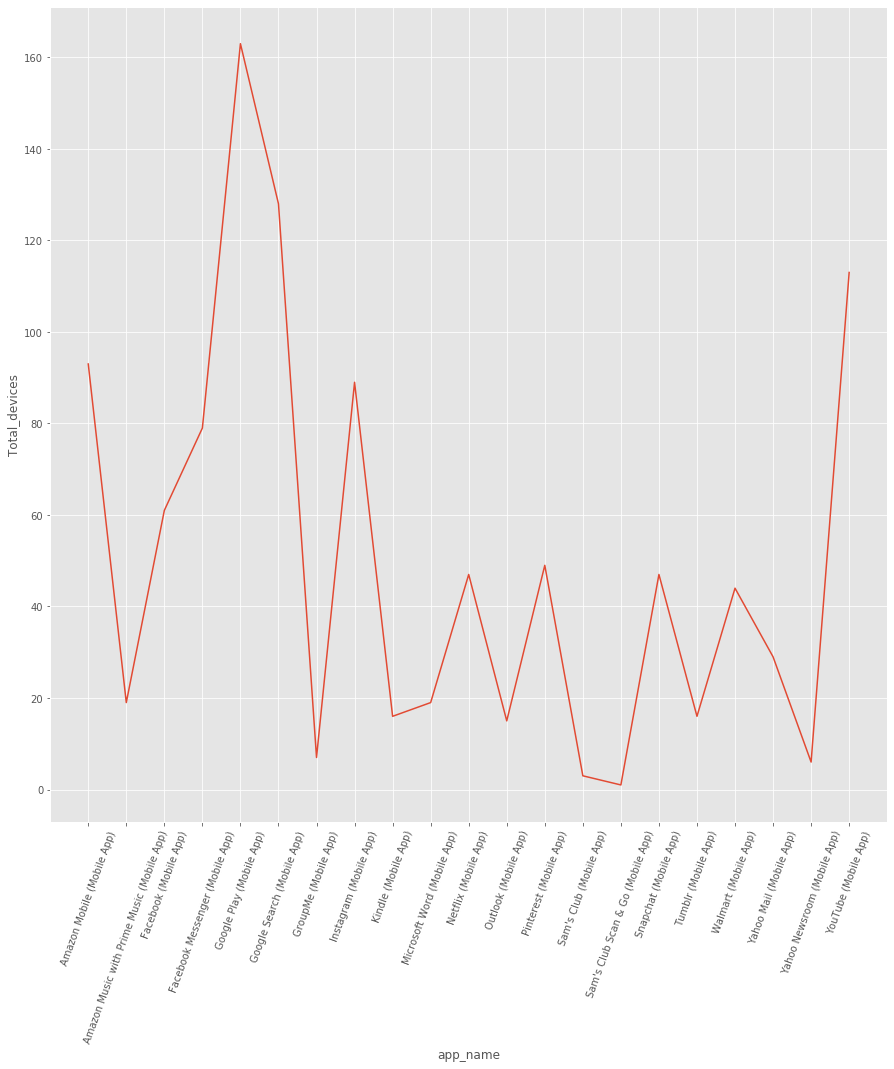

In [133]:
# create line plot for app name vs total devices
plt.figure(figsize=(15,15))
sns.lineplot(data=New_df,x='app_name',y='Total_devices')
plt.xticks(rotation=70)
plt.show()

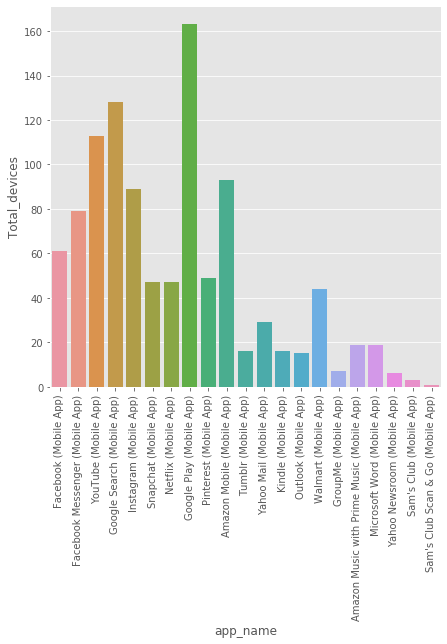

In [134]:
# Create bar plot for app_name vs total devices
plt.figure(figsize=(7,7))
sns.barplot(data=New_df,x='app_name',y='Total_devices')
plt.xticks(rotation=90)
plt.show()

In [136]:
# Create Pie chart to show avg time spend per device per app
pdata = New_df.groupby('app_name')['Avg_time_spent_per_device'].sum()
pdata

app_name
Amazon Mobile (Mobile App)                     172.995561
Amazon Music with Prime Music (Mobile App)      87.238421
Facebook (Mobile App)                         8425.918062
Facebook Messenger (Mobile App)               5284.011759
Google Play (Mobile App)                       167.022663
Google Search (Mobile App)                    1099.334152
GroupMe (Mobile App)                           254.669400
Instagram (Mobile App)                        1217.686652
Kindle (Mobile App)                            337.282312
Microsoft Word (Mobile App)                     45.950874
Netflix (Mobile App)                           796.821587
Outlook (Mobile App)                           237.401640
Pinterest (Mobile App)                         455.351143
Sam's Club (Mobile App)                         31.008600
Sam's Club Scan & Go (Mobile App)                0.037800
Snapchat (Mobile App)                         1540.719153
Tumblr (Mobile App)                            893.653425
Walma

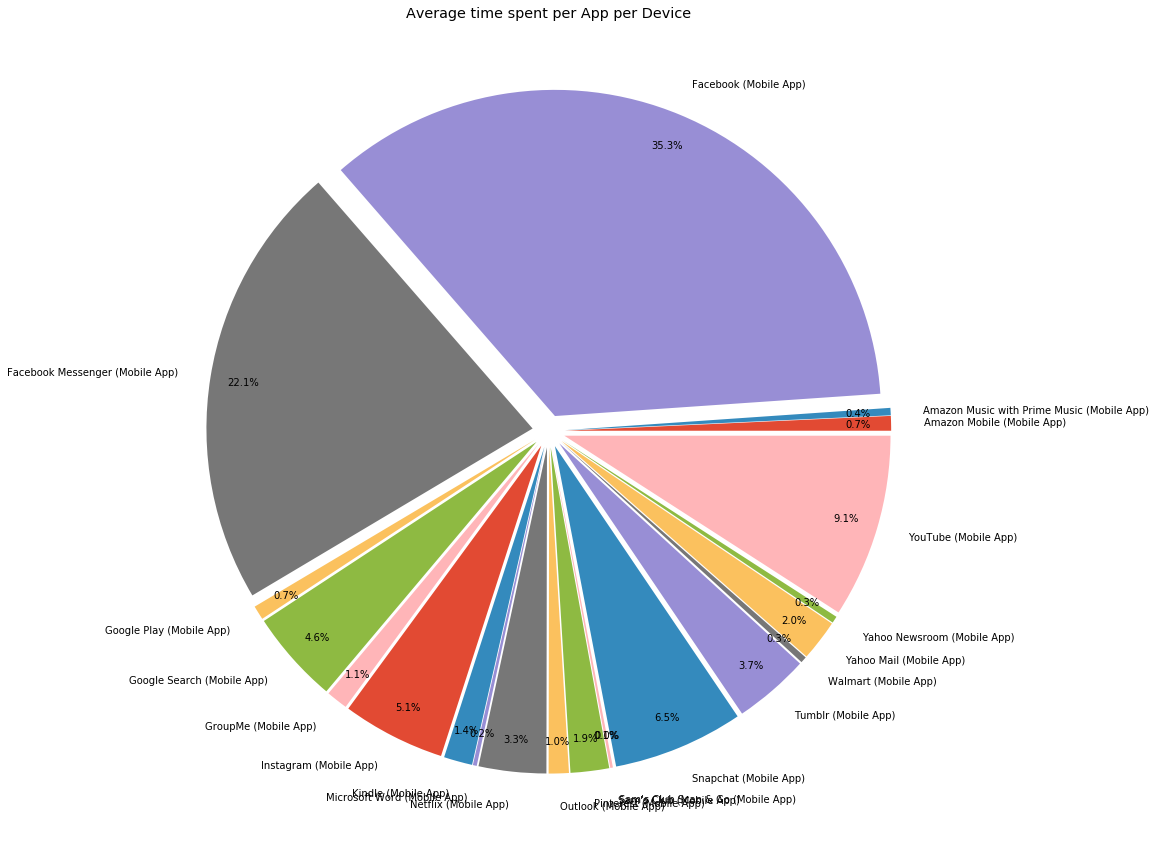

In [142]:
# Create Pie chart to show avg time spend per device per app
plt.figure(figsize=(15,15))
plt.title('Average time spent per App per Device')
plt.pie(pdata,labels=pdata.keys(),autopct="%.1f%%",pctdistance=0.9,explode=[0.05]*len(pdata))
plt.show()

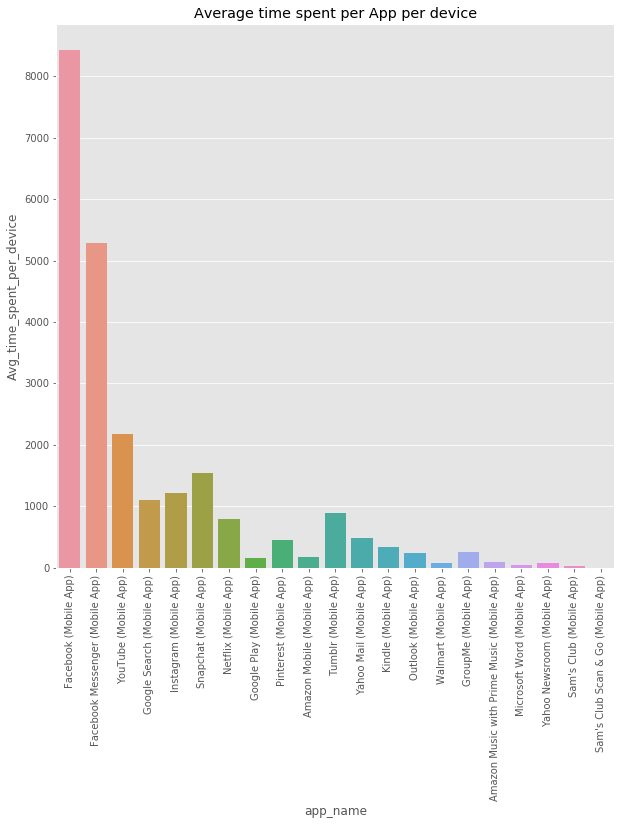

In [143]:
plt.figure(figsize=(10,10))
sns.barplot(data=New_df,x='app_name',y='Avg_time_spent_per_device')
plt.title('Average time spent per App per device')
plt.xticks(rotation=90)
plt.show()

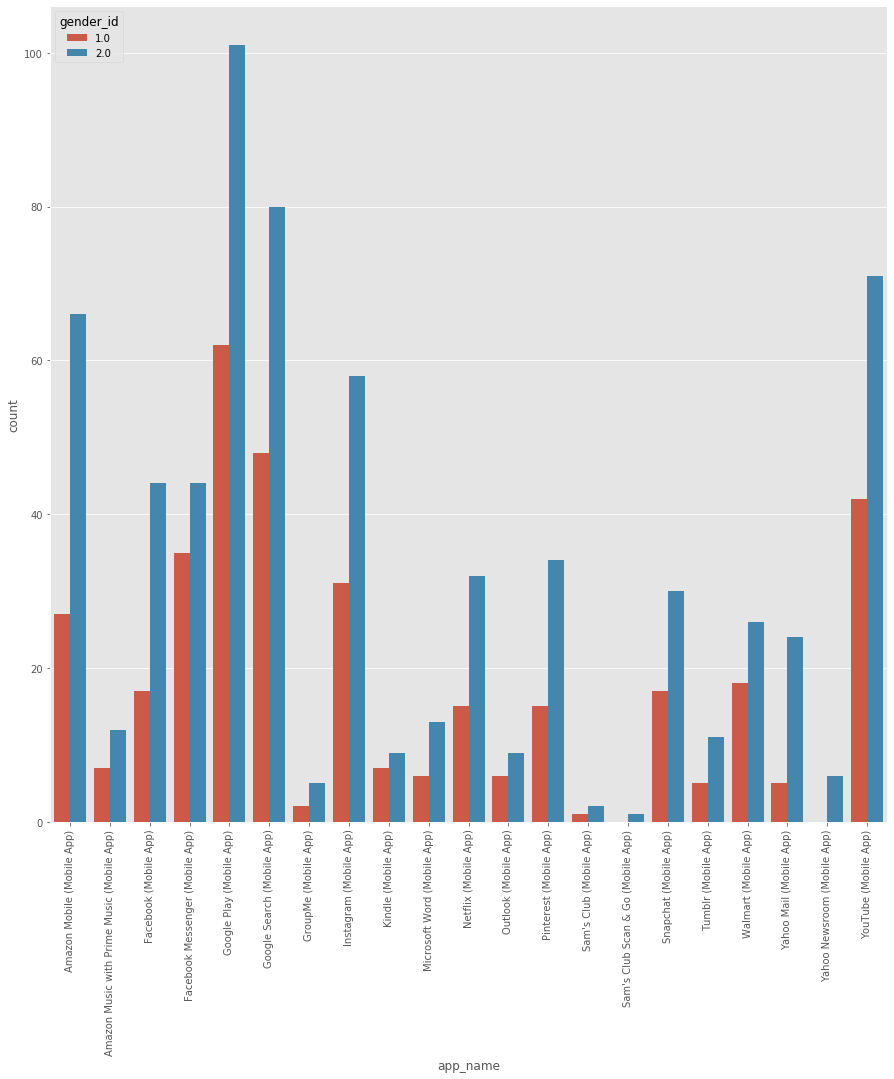

In [144]:
# Plot to show users across Apps across gender
plt.figure(figsize=(15,15))
sns.countplot(data=df_filtered,x='app_name',hue='gender_id')
plt.xticks(rotation=90)
plt.show()